In [1]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
#!pip install matplotlib
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading dataset

new_train_filtered1=pd.read_csv('new_train_filtered1.csv')
new_train_filtered1

Merged_test_df = pd.read_csv('Merged_test_df.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_2772\4190010616.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Merged_test_df = pd.read_csv('Merged_test_df.csv')


In [3]:
new_train_filtered1.drop(["Unnamed: 0"], axis=1, inplace=True)

## 2.1 Preprocessing

### Extract Weekdays from Dataset DayOfWeek

In [4]:
new_train_filtered1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,20150731,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31
1,2,5,20150731,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31
2,3,5,20150731,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31
3,5,5,20150731,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31
4,6,5,20150731,5651,589,1,1,1,310.0,12.0,2013.0,0,0.0,0.0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979031,1111,2,20130101,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0,2013,1,1
979032,1112,2,20130101,0,0,0,0,1,1880.0,4.0,2006.0,0,0.0,0.0,2013,1,1
979033,1113,2,20130101,0,0,0,0,1,9260.0,0.0,0.0,0,0.0,0.0,2013,1,1
979034,1114,2,20130101,0,0,0,0,1,870.0,0.0,0.0,0,0.0,0.0,2013,1,1


In [5]:
day_of_week_mapping = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
    5: 'Friday', 6: 'Saturday', 7: 'Sunday'
}
new_train_filtered1['Weekday'] = new_train_filtered1['DayOfWeek'].map(day_of_week_mapping)

new_train_filtered1[['DayOfWeek', 'Weekday']]


,DayOfWeek,Weekday
0,5,Friday
1,5,Friday
2,5,Friday
3,5,Friday
4,5,Friday
...,...,...
979031,2,Tuesday
979032,2,Tuesday
979033,2,Tuesday
979034,2,Tuesday


### Extract Weekend from Dataset DayOfWeek

In [6]:
new_train_filtered1['Weekend'] = new_train_filtered1['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

new_train_filtered1[['DayOfWeek','Weekend']]


,DayOfWeek,Weekend
0,5,0
1,5,0
2,5,0
3,5,0
4,5,0
...,...,...
979031,2,0
979032,2,0
979033,2,0
979034,2,0


In [7]:
new_train_filtered1['Weekend'].unique()

array([0, 1], dtype=int64)

### number of days to holidays

In [8]:
def categorize_day(day):
    if 1 <= day <= 10:
        return 'Beginning'
    elif 11 <= day <= 20:
        return 'Mid'
    else:
        return 'End'

new_train_filtered1['MonthPeriod'] = new_train_filtered1['Day'].apply(categorize_day)

new_train_filtered1[['Day', 'MonthPeriod']]



,Day,MonthPeriod
0,31,End
1,31,End
2,31,End
3,31,End
4,31,End
...,...,...
979031,1,Beginning
979032,1,Beginning
979033,1,Beginning
979034,1,Beginning


In [9]:
#new_train_filtered1.to_csv("new_train_filtered_df.csv")
new_train_filtered1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,Weekday,Weekend,MonthPeriod
0,1,5,20150731,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,Friday,0,End
1,2,5,20150731,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31,Friday,0,End
2,3,5,20150731,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31,Friday,0,End
3,5,5,20150731,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31,Friday,0,End
4,6,5,20150731,5651,589,1,1,1,310.0,12.0,2013.0,0,0.0,0.0,2015,7,31,Friday,0,End
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979031,1111,2,20130101,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0,2013,1,1,Tuesday,0,Beginning
979032,1112,2,20130101,0,0,0,0,1,1880.0,4.0,2006.0,0,0.0,0.0,2013,1,1,Tuesday,0,Beginning
979033,1113,2,20130101,0,0,0,0,1,9260.0,0.0,0.0,0,0.0,0.0,2013,1,1,Tuesday,0,Beginning
979034,1114,2,20130101,0,0,0,0,1,870.0,0.0,0.0,0,0.0,0.0,2013,1,1,Tuesday,0,Beginning


In [10]:
new_train_filtered1.drop(['Weekday', 'MonthPeriod'], axis=1, inplace=True)

In [11]:
new_train_filtered1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979036 entries, 0 to 979035
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      979036 non-null  int64  
 1   DayOfWeek                  979036 non-null  int64  
 2   Date                       979036 non-null  int64  
 3   Sales                      979036 non-null  int64  
 4   Customers                  979036 non-null  int64  
 5   Open                       979036 non-null  int64  
 6   Promo                      979036 non-null  int64  
 7   SchoolHoliday              979036 non-null  int64  
 8   CompetitionDistance        979036 non-null  float64
 9   CompetitionOpenSinceMonth  979036 non-null  float64
 10  CompetitionOpenSinceYear   979036 non-null  float64
 11  Promo2                     979036 non-null  int64  
 12  Promo2SinceWeek            979036 non-null  float64
 13  Promo2SinceYear            97

In [12]:
#from sklearn.preprocessing import StandardScaler

#numerical_features = ['Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
#scaler = StandardScaler()
#new_train_filtered1[numerical_features] = scaler.fit_transform(new_train_filtered1[numerical_features])
#new_train_filtered1[numerical_features].head()


## standard scaler 

In [13]:

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(new_train_filtered1)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=new_train_filtered1.columns)
scaled_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,Weekend
0,-1.719168,0.4891,1.532168,-0.049740,-0.062221,0.462985,1.290641,2.153598,-0.554556,0.946308,0.682037,-1.021015,-0.77152,-1.021014,1.498882,0.35295,1.741963,-0.637628
1,-1.716080,0.4891,1.532168,0.185546,0.134997,0.462985,1.290641,2.153598,-0.644851,1.412572,0.680968,0.979418,0.07647,0.977675,1.498882,0.35295,1.741963,-0.637628
2,-1.712992,0.4891,1.532168,0.846464,0.687209,0.462985,1.290641,2.153598,1.104301,1.645704,0.679898,0.979418,0.14170,0.978669,1.498882,0.35295,1.741963,-0.637628
3,-1.706816,0.4891,1.532168,-0.179280,-0.050951,0.462985,1.290641,2.153598,3.139818,-0.219353,0.689520,-1.021015,-0.77152,-1.021014,1.498882,0.35295,1.741963,-0.637628
4,-1.703727,0.4891,1.532168,0.064231,0.033571,0.462985,1.290641,2.153598,-0.678389,1.645704,0.687382,-1.021015,-0.77152,-1.021014,1.498882,0.35295,1.741963,-0.637628


## 2.2 Building models with sklearn pipelines

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

New_df_encoded = pd.get_dummies(new_train_filtered1)

print(New_df_encoded)

        Store  DayOfWeek      Date  Sales  Customers  Open  Promo  \
0           1          5  20150731   5263        555     1      1   
1           2          5  20150731   6064        625     1      1   
2           3          5  20150731   8314        821     1      1   
3           5          5  20150731   4822        559     1      1   
4           6          5  20150731   5651        589     1      1   
...       ...        ...       ...    ...        ...   ...    ...   
979031   1111          2  20130101      0          0     0      0   
979032   1112          2  20130101      0          0     0      0   
979033   1113          2  20130101      0          0     0      0   
979034   1114          2  20130101      0          0     0      0   
979035   1115          2  20130101      0          0     0      0   

        SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0                   1               1270.0                        9.0   
1                   1    

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LogisticRegression



In [16]:
# Separate the target variable 'Sales' from the train dataset
X = New_df_encoded.drop('Promo2', axis=1)  # Features
y = New_df_encoded['Promo2']  # Target variable

In [17]:

# One-hot encoding of categorical variables
X = pd.get_dummies(X, drop_first=True)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0
R-squared: 1.0


In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_features = ['Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
categorical_features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [21]:
#Defining and Building the Pipeline

from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customers',
                                                   'CompetitionDistance',
                                                   'CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Store', 'DayOfWeek',
                                                   'Promo', 'StateHoliday',
                                                   'StoreType',
                                                   'Assortment'])])),
                ('model', RandomForestRegressor(random_state=42))])

## 2.4 Post Prediction analysis

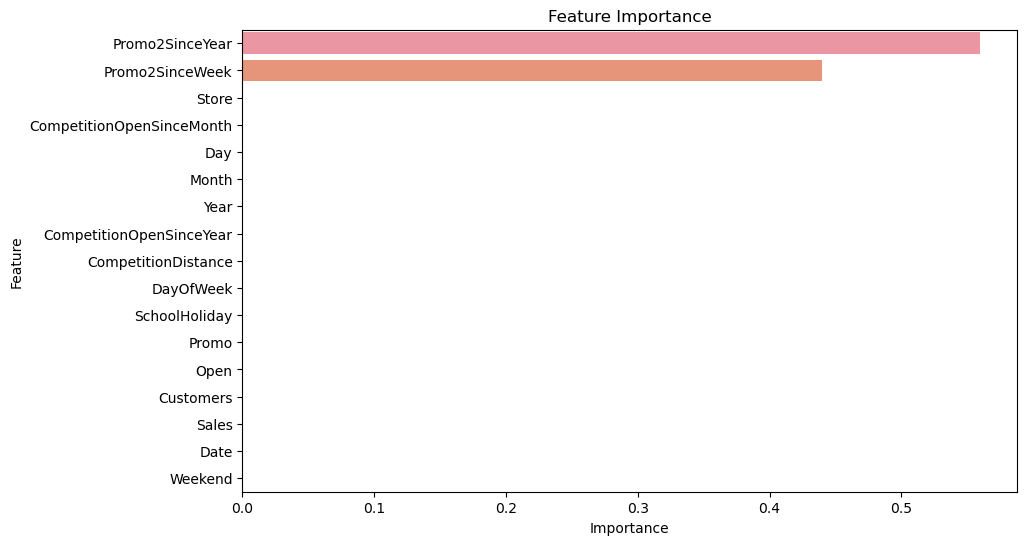

In [22]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


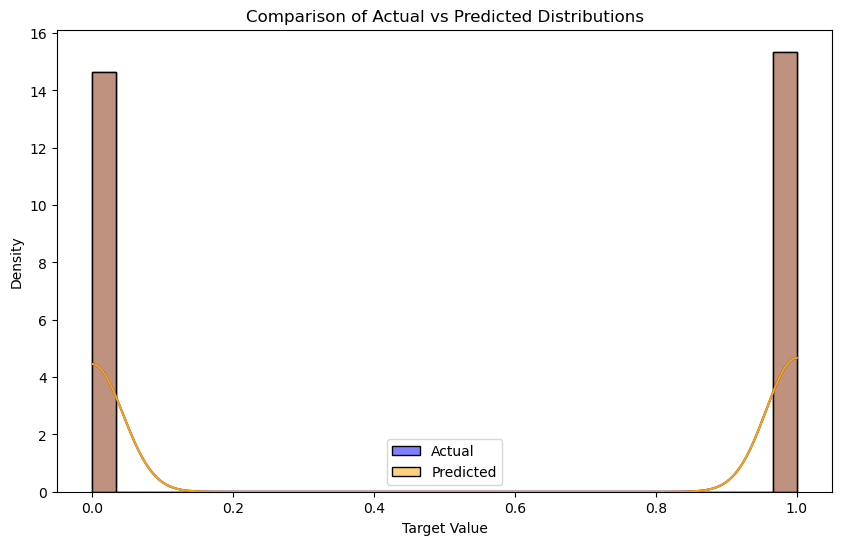

In [23]:
# Compare distributions of actual and predicted values
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat='density', bins=30)
sns.histplot(predictions, color='orange', label='Predicted', kde=True, stat='density', bins=30)
plt.legend()
plt.xlabel('Target Value')
plt.title('Comparison of Actual vs Predicted Distributions')
plt.show()


###  the model appears to perform well, with relatively low MAE and RMSE and a high R² score, indicating that it can make reasonably accurate predictions with low average error and strong variance capture.

## 2.5 Serialize models

In [24]:
import pickle
from datetime import datetime

#Random Forest Regressor
model = RandomForestRegressor() 

timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")
filename = f"model_{timestamp}.pkl"

# Serialize and save the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename}")


Model saved as model_07-11-2024-23-45-52-752286.pkl


## 2.6 Building model with deep learning

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import matplotlib.pyplot as plt

## Isolate the Rossmann Store Sales dataset into time series data

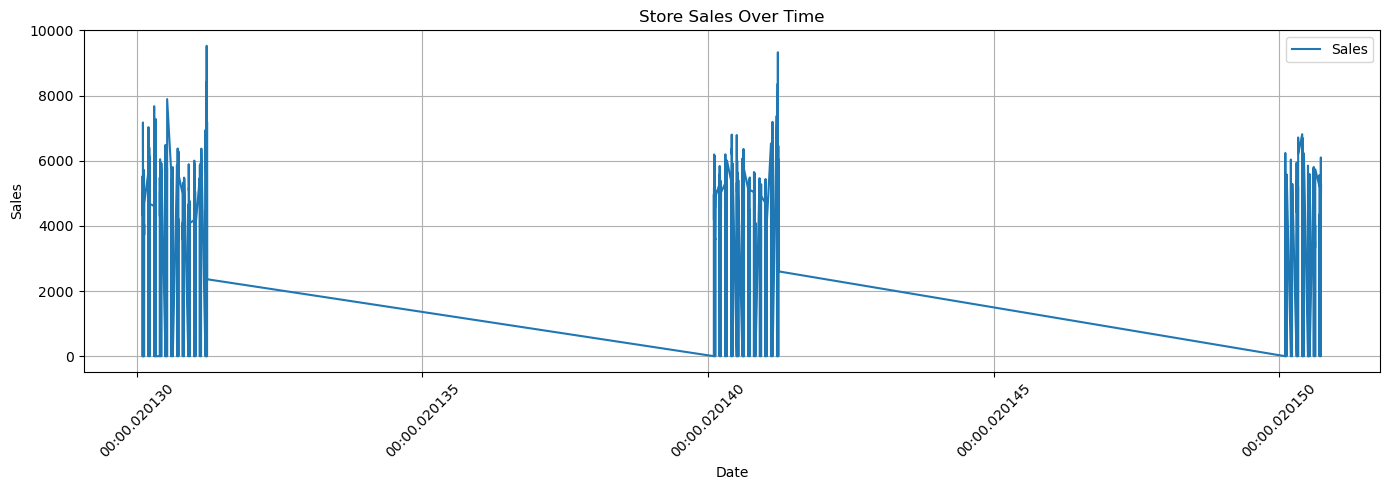

In [30]:

New_df_encoded['Date'] = pd.to_datetime(New_df_encoded['Date'])

# Filter for a specific store
store_sales = New_df_encoded[New_df_encoded['Store'] == 1].copy()

# Set the 'Date' column as the index
store_sales.set_index('Date', inplace=True)

# Select only 'Sales' column for time series analysis
time_series_data = store_sales[['Sales']]
time_series_data

# Plot the time series data
plt.figure(figsize=(14, 5))
plt.plot(time_series_data.index, time_series_data['Sales'], label='Sales')
plt.title('Store Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45) 
plt.legend()
plt.grid()
plt.tight_layout() 
plt.show()


## Check whether your time Series Data is Stationary

In [33]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(time_series_data.dropna(), maxlag=10)

In [34]:
# Now Perform ADF test on sales data
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] > 0.05:
    print("Non Stationary")

ADF Statistic: -9.831435815454025
p-value: 5.0249836787756275e-17


### Since the ADF test statistic is highly negative, and the p-value is small, we can reject the null hypothesis means time series is stationary.

## Scale your data in the (-1, 1) range


In [36]:
# Normalize the sales data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(time_series_data)

# Define the sequence length
sequence_length = 30

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Use TimeseriesGenerator to create sequences for LSTM
train_generator = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=32)
test_generator = TimeseriesGenerator(test_data, test_data, length=sequence_length, batch_size=32)


In [28]:
from tensorflow.keras.layers import Dropout

# Initialize the LSTM model
model = Sequential()

# First LSTM layer with dropout for regularization
model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))

# Second LSTM layer without return sequences as it's the last LSTM layer
model.add(LSTM(32))
model.add(Dropout(0.2))

# Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print model summary
model.summary()


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1608

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1175 - val_loss: 0.0583
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0492 - val_loss: 0.0546
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0593 - val_loss: 0.0538
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0455 - val_loss: 0.0524
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0449 - val_loss: 0.0522
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0513 - val_loss: 0.0520
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0420 - val_loss: 0.0519
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0449 - val_loss: 0.0517
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0472 - val_loss: 0.0524
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0423 - val_loss: 0.0529
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0469 - val_loss: 0.0535
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0489 - val_l

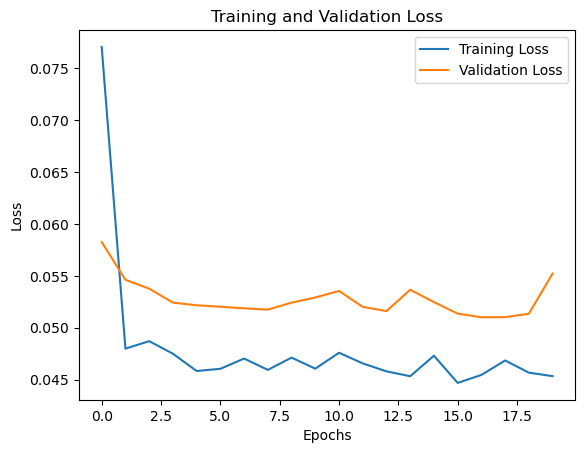

In [29]:
# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=20, verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#### The plot depicts the sales data as a continuous line, which indicates fluctuations in sales over time. There are visible peaks and troughs, suggesting that sales vary from one time period to another.
#### Notable trends can be observed:
#### Increasing Sales: There might be periods where sales show a general upward trend, indicating growing business or successful promotions.
#### Seasonal Patterns: The graph may display recurring patterns, such as higher sales during specific months (e.g., holidays or promotional seasons), followed by lower sales during off-peak times.